In [48]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [22]:
# Melakukan pembacaan dataset
df = pd.read_csv("./data/dataset.csv")

# Penjelasakan kode diatas
# pd.read_csv() digunakan untuk membaca file csv
# Yang kemudian hasil pembacaan file csv tersebut disimpan ke dalam variabel df

# Memahami tentang isi dataset

In [23]:
# Pemahhaman terhadap dataset

# Menampilkan 5 data teratas menggunakan head()
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [24]:
# Melakukan pengecekan ukuran pada dataset menggunakan .shape
df.shape

(500, 8)

In [25]:
# Menampilkan informasi tentang dataset menggunakan .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [26]:
# Menampilkan deskripsi tentang dataset menggunakan .describe()
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Melakukan visualisasi data

/home/gin_arata/.conda/envs/machine-learning/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


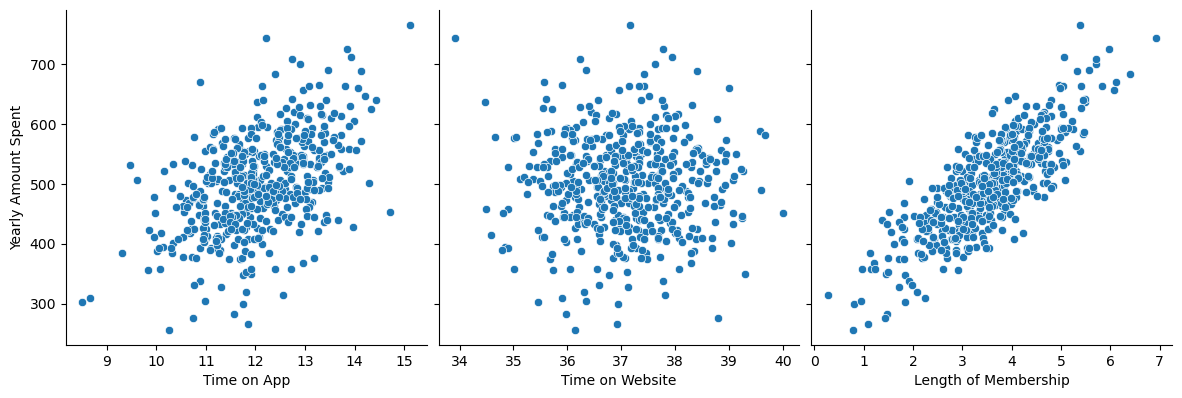

In [27]:
# Menampilkan hubungan antar variable bebas dan variable target pada dataset menggunakan pairplot()

sns.pairplot(df, x_vars=['Time on App', 'Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

# Penjelasan kode diatas
# sns.pairplot() digunakan untuk mengkomparasikan diagram plot antar variable bebas dan variable target
# x_vars merupakan variable yang akan diisi pada sumbu x dimana biasanya digunakan untuk variable bebas
# y_vars merupakan variable yang akan diisi pada sumbu y dimana biasanya digunakan untuk variable target
# size digunakan untuk mengatur ukuran dari plot
# aspect digunakan untuk mengatur aspek rasio dari plot
# kind='scatter' diguanakn untuk menentukan jenis plot yang akan digunakan. Yang digunakan kali ini merupakan jenis scatter plot
# plt.show() digunakan untuk menampilkan plot

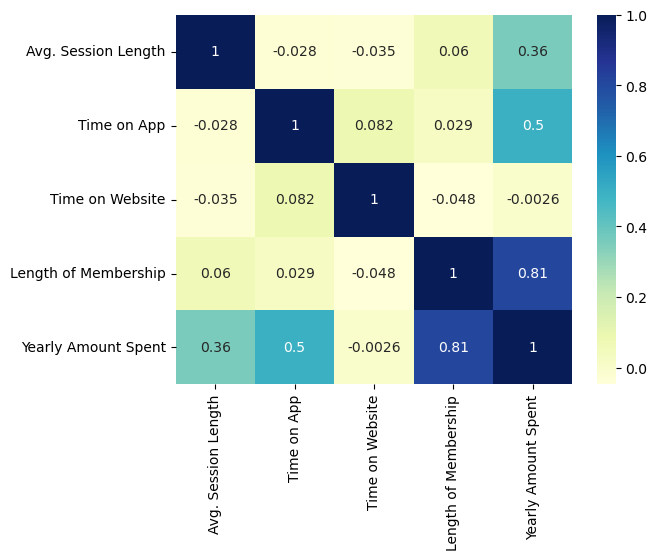

In [30]:
# Melakukan visualisasi menggunakan heatmap

df_numeric = df.select_dtypes(exclude=['object'])

sns.heatmap(df_numeric.corr(), cmap='YlGnBu', annot=True)
plt.show()

# Penjelasan kode diatas
# df.select_dtypes(exclude=['object']) digunakan untuk mengecualikan tipe data object pada dataset
# snd.heatmap() digunakan untuk membuat heatmap dari dataset 
# cmap digunakan untuk memberikan warna pada heatmap
# annot digunakan untuk menampilkan angka pada heatmap

# Informasi yang bisa didapatkan dari heatmap
'''
    1. Melihat korelasi antar variable
    2. Melihat identifikasi pola pada data
    3. Untuk menentukan/melihat outlier pada dataset
    4. Untuk melihat hubungan antar banyak variable
'''

# Regresi Linear

In [33]:
# Membuat variable bebas dan variable target dari analisis korelasi sebelumnya 

X = df['Length of Membership']
y = df['Yearly Amount Spent']

In [35]:
# Melakukan pemisahan data training dan data testing

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.7, random_state=100)

# Penjelasan kode diatas
# - train_test_split digunakan untuk melakukan pembagian dataset menjadi data training dan data testing dari variable independen dan variable dependen
# - X merupakan variable independen
# - y merupakan variable dependen
# - test_size digunakan untuk menentukan ukuran data testing
# - random_state digunakan untuk menentukan nilai random yang dimana jika diisi train test split akan menghasilkan nilai data training dan data testing yang sama setiap kali dijalankan kembali. Sehingga hasilnya akan menjadi konsisten

# Training model

In [37]:
# Melakukan training model menggunakan library statsmodels

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Penjelasan kode diatas
# sm.add_constant() digunakan untuk menambahkan kolom konstanta pada variable independen. Penambahan kolom konstanta ini diperlukan untuk menghitung nilai intercept pada model linear regression
# sm.OLS() digunakan unttuk membuat model Ordinary Least Square atau linear regression. y_train merupakan variable dependen dan X_train_sm merupakan variable independen. .fit() digunakan untuk menyesuaikan model OLS/Linear Regression dengan data training yang diberikan

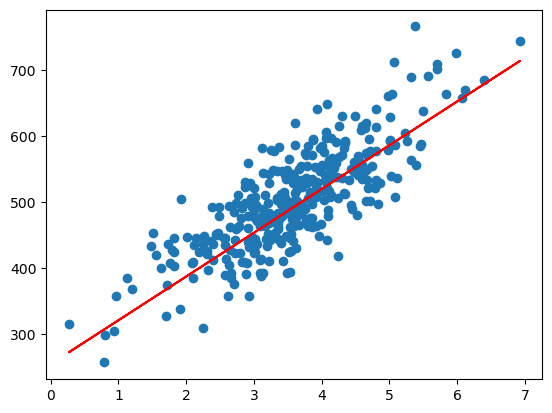

In [38]:
# Visualisasi hasil training model
plt.scatter(X_train, y_train)
plt.plot(X_train, 254.2483 + 66.3015 * X_train, 'r')
plt.show()

# Penjelasan kode diatas
# plt.scatter() digunakan untuk membuat scatter plot dari data training
# plt.plot() digunakan untuk membuat garis plot dari hasil training model

# Analisis Residual

In [40]:
# Melakukan prediksi nilai dari data training

y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = y_train - y_train_pred


# Penjelasan kode diatas
# lr.predict digunakan untuk melakukan prediksi terhadap data training yang telah diberikan kolom konstanta
# res digunakan untuk menghitung nilai residual dari data training

<Figure size 640x480 with 0 Axes>

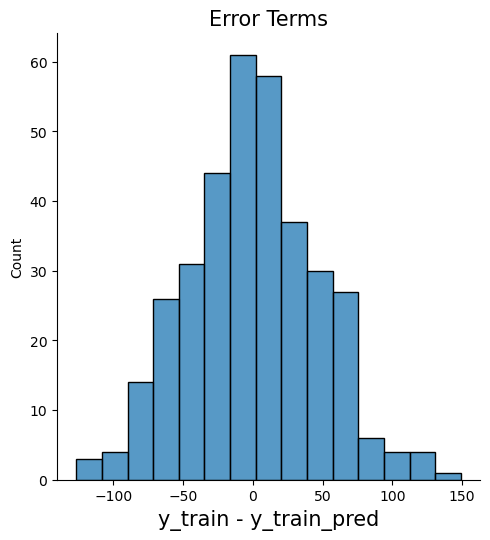

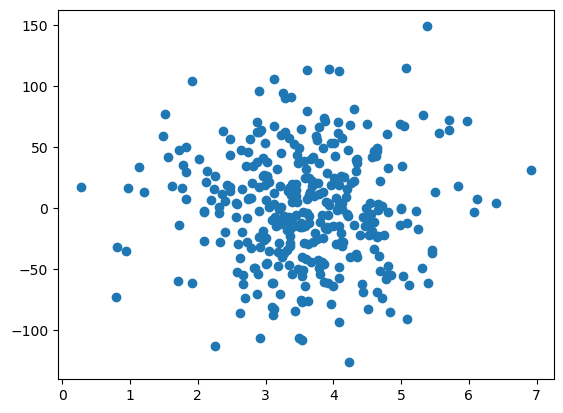

In [46]:
# Menampilkan plot histogram residual
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()


# Menampilkan plot scatter residual
plt.scatter(X_train, res)
plt.show()

# Prediksi data pada data uji

In [47]:
# Melakukan prediksi pada data testing
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [53]:
# Mengitung nilai R-squared

r_squared = r2_score(y_test, y_test_pred)

# Penjelasan kode diatas
# r2_score() digunakan untuk menghitung nilai R-squared dari prediksi data testing dan data testing yang sebenarnya

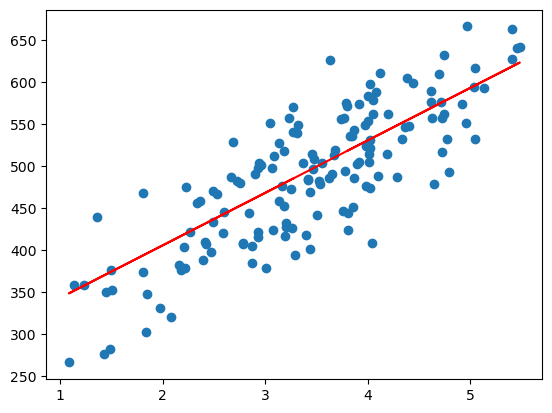

In [54]:
# Menampilkan visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()